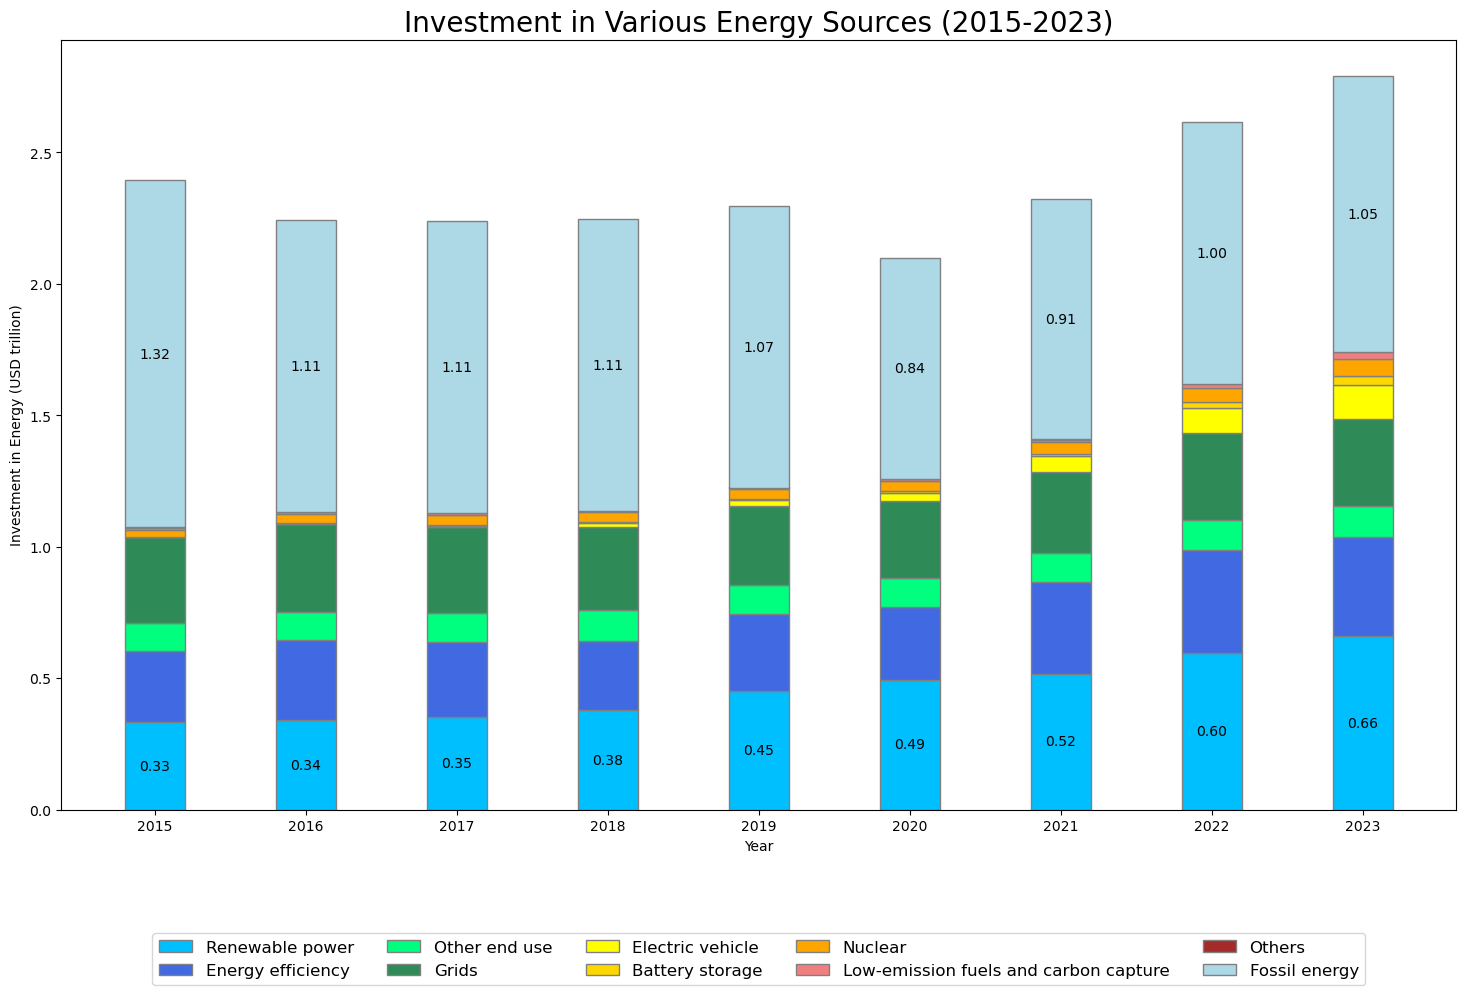

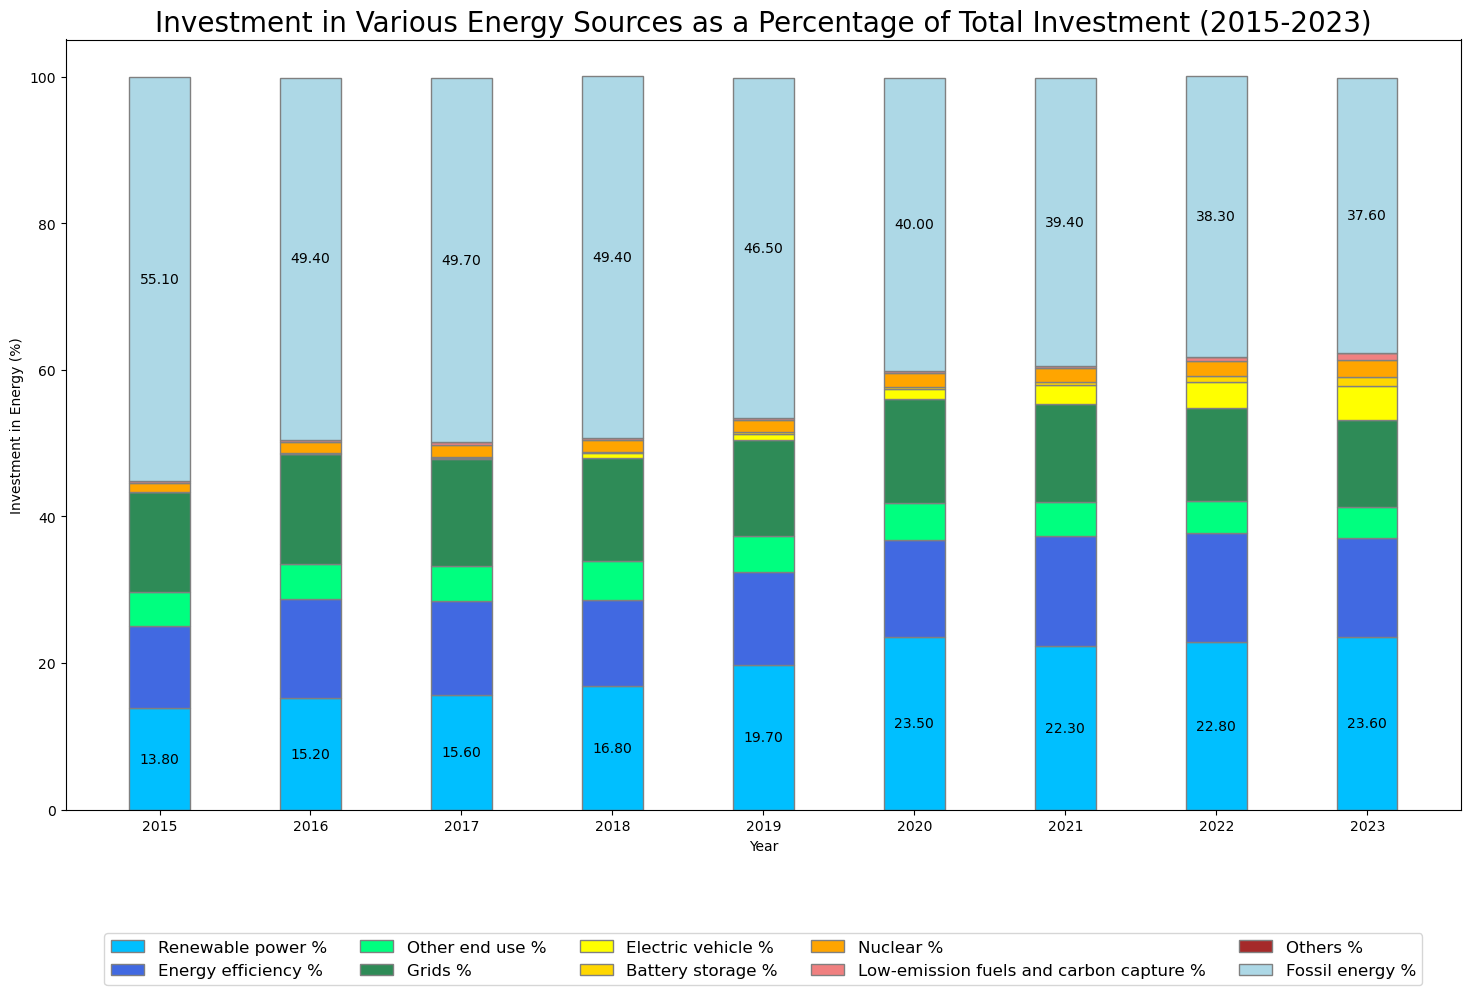

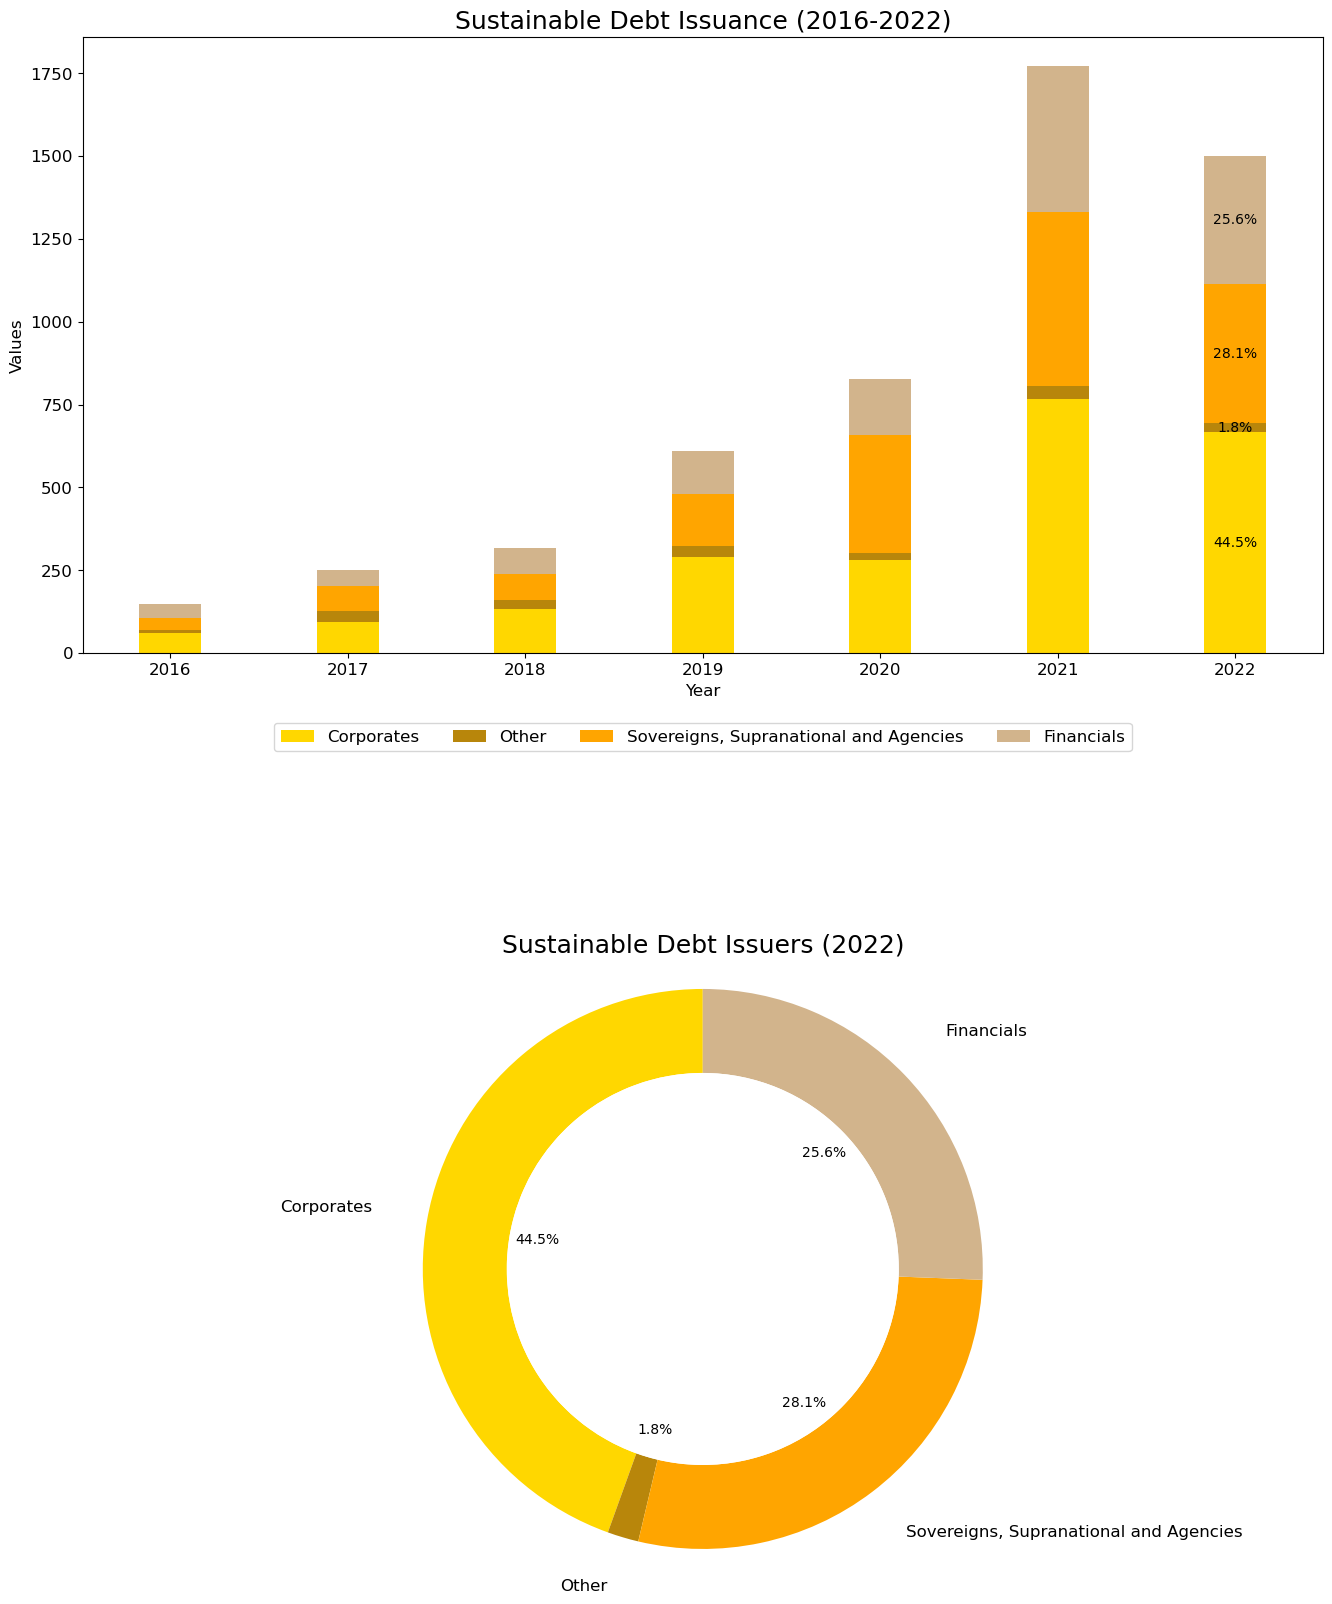

In [1]:
# Chart 5.16 and 5.17

import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
#df = pd.read_csv('/mnt/data/Global_Energy_Investment_Dataset_7A1.csv')
df = pd.read_csv('CSV_7.A.1_EnInv.csv')

# Remove the percentage sign (%) from the percentage columns and convert the data type to float
percentage_columns = ['Renewable power %', 'Energy efficiency %', 'Other end use %', 'Grids %', 'Electric vehicle %', 'Battery storage %', 'Nuclear %', 'Low-emission fuels and carbon capture %', 'Others %', 'Clean eneregy %', 'Fossil energy %']
for column in percentage_columns:
    df[column] = df[column].str.rstrip('%').astype('float')

# Define the column names
columns = ['Renewable power', 'Energy efficiency', 'Other end use', 'Grids', 'Electric vehicle', 'Battery storage', 'Nuclear', 'Low-emission fuels and carbon capture', 'Others', 'Fossil energy']
columns_percentage = [column + ' %' for column in columns]
barWidth = 0.4

# Define color for each column
color_dict = {
    'Renewable power': 'deepskyblue',
    'Energy efficiency': 'royalblue',
    'Other end use': 'springgreen',
    'Grids': 'seagreen',
    'Electric vehicle': 'yellow',
    'Battery storage': 'gold',
    'Nuclear': 'orange',
    'Low-emission fuels and carbon capture': 'lightcoral',
    'Others': 'brown',
    'Fossil energy': 'lightblue',
    'Renewable power %': 'deepskyblue',
    'Energy efficiency %': 'royalblue',
    'Other end use %': 'springgreen',
    'Grids %': 'seagreen',
    'Electric vehicle %': 'yellow',
    'Battery storage %': 'gold',
    'Nuclear %': 'orange',
    'Low-emission fuels and carbon capture %': 'lightcoral',
    'Others %': 'brown',
    'Fossil energy %': 'lightblue'
}


# Create first combined bar chart with larger legend at the bottom
plt.figure(figsize=(18, 10))
for i, column in enumerate(columns):
    bottoms = df[columns[:i]].sum(axis=1) / 1e12 if i > 0 else 0
    plt.bar(df['Year'], df[column] / 1e12, bottom=bottoms, color=color_dict[column], edgecolor ='grey', width = barWidth)
    if column == 'Fossil energy' or column == 'Renewable power':
        for x,y in zip(df['Year'], df[column] / 1e12):
            bottom_val = bottoms.loc[x - df['Year'].min()] if isinstance(bottoms, pd.Series) else bottoms
            plt.text(x, y/2 + bottom_val, '{:.2f}'.format(y), ha = 'center', va = 'center')
plt.legend(columns, bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=5, prop={'size': 12})
plt.xlabel('Year')
plt.xticks(df['Year'])
plt.ylabel('Investment in Energy (USD trillion)')
plt.title('Investment in Various Energy Sources (2015-2023)', fontsize=20)
plt.show()

# Create second combined bar chart with larger legend at the bottom
plt.figure(figsize=(18, 10))
for i, column in enumerate(columns_percentage):
    bottoms = df[columns_percentage[:i]].sum(axis=1) if i > 0 else 0
    plt.bar(df['Year'], df[column], bottom=bottoms, color=color_dict[column], edgecolor ='grey', width = barWidth)
    if column == 'Fossil energy %' or column == 'Renewable power %':
        for x,y in zip(df['Year'], df[column]):
            bottom_val = bottoms.loc[x - df['Year'].min()] if isinstance(bottoms, pd.Series) else bottoms
            plt.text(x, y/2 + bottom_val, '{:.2f}'.format(y), ha = 'center', va = 'center')
plt.legend(columns_percentage, bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=5, prop={'size': 12})
plt.xlabel('Year')
plt.xticks(df['Year'])
plt.ylabel('Investment in Energy (%)')
plt.title('Investment in Various Energy Sources as a Percentage of Total Investment (2015-2023)', fontsize=20)
plt.show()


# Chart 5.18 and 5.19

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
#data = pd.read_csv('/mnt/data/Sustainable_Debt_Issuance_7A1.csv')
data = pd.read_csv('CSV_7.A.1_SusDebt.csv')

# Drop the extraneous column
data = data.drop(columns=['Unnamed: 8'])

# Process the data
data = data[data['Unnamed: 0'] != 'Total']
data = data.rename(columns={'Unnamed: 0': 'Category'})
colors = ['gold', 'darkgoldenrod', 'orange', 'tan']
data_reordered = data.set_index('Category').reindex(['Corporates', 'Other', 'Sovereigns, Supranational and Agencies', 'Financials']).reset_index()
wide_data = data_reordered.set_index("Category").T
wide_data.index = wide_data.index.astype(int)

# Function to compute percentage values for 2022
def compute_percentage(row):
    total = row.sum()
    return [(val/total)*100 for val in row]

percentages_2022 = compute_percentage(wide_data.loc[2022])

# Adjust label function for doughnut chart
def adjust_labels(patches, labels, ax):
    for patch, label in zip(patches, labels):
        angle = (patch.theta2 - patch.theta1)/2. + patch.theta1
        y = np.sin(np.deg2rad(angle))
        x = np.cos(np.deg2rad(angle))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        if label == "Sovereigns, Supranational and agencies":
            ax.text(x*1.2, y-0.1, label, horizontalalignment=horizontalalignment, fontsize=12)
        else:
            ax.text(x*1.2, y*1.2, label, horizontalalignment=horizontalalignment, fontsize=12)

# Plotting function with updated bar chart with percentages for 2022
def plot_charts():
    fig, ax = plt.subplots(2, 1, figsize=(16, 20))
    fig.subplots_adjust(hspace=0.5)
    positions = np.arange(len(wide_data.index))
    ax[0].set_title("Sustainable Debt Issuance (2016-2022)", fontsize=18)
    ax[0].set_ylabel('Values', fontsize=12)
    ax[0].set_xlabel('Year', fontsize=12)
    ax[0].tick_params(axis='both', which='major', labelsize=12)
    bar_width = 0.35
    for i, category in enumerate(wide_data.columns):
        bars = ax[0].bar(positions, wide_data[category], 
               bottom=(wide_data.iloc[:, :i].sum(axis=1) if i > 0 else 0),
               color=colors[i], label=category, width=bar_width)
        # Add percentage labels for 2022
        if wide_data.columns[i] in data_reordered['Category'].values:
            height = bars.patches[-1].get_height() 
            ax[0].text(positions[-1], bars.patches[-1].get_y() + height/2, f"{percentages_2022[i]:.1f}%", ha='center', va='center', color='black', fontsize=10)
    ax[0].set_xticks(positions)
    ax[0].set_xticklabels(wide_data.index)
    ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4, fontsize=12)
    ax[0].tick_params(axis='x', rotation=0)
    ax[1].set_title("Sustainable Debt Issuers (2022)", fontsize=18)
    patches, texts, autotexts = ax[1].pie(data_reordered['2022'], labels=data_reordered['Category'], autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3))
    for text in texts:
        text.set_visible(False)
    adjust_labels(patches, data_reordered['Category'], ax[1])
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig.gca().add_artist(centre_circle)
    ax[1].axis('equal') 
    plt.show()

plot_charts()

# Python codes are available on GitHub at: https://github.com/BlockQuant18/SU-PHD-TM
